# **Install YOLOv8:**

In [ ]:
!nvidia-smi

Mon Jun 12 13:33:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 27.4 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.4 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path_img = "./yolo_data/images/train/"
train_path_label = "./yolo_data/labels/train/"
val_path_img = "./yolo_data/images/val/"
val_path_label = "./yolo_data/labels/val/"
test_path = "./yolo_data/test"

In [ ]:
def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)


    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")

## spliting the data into train-test and creating train.txt and test.txt files
# train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

### for label_tag
train_test_split('/content/drive/Shareddrives/CapstoneBangkit/Model/datanew/') ### without negative images
# train_test_split('./data/','./negative_images/') ### if you want to feed negative images


------ PROCESS STARTED -------
--- This folder has a total number of 257 images---


  0%|          | 0/206 [00:00<?, ?it/s]

------ Training data created with 80% split 206 images -------


  0%|          | 0/51 [00:00<?, ?it/s]

------ Testing data created with a total of 51 images ----------
------ TASK COMPLETED -------


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


In [ ]:
!yolo detect train data=/content/drive/Shareddrives/CapstoneBangkit/Model/dataset.yaml model=yolov8n.pt epochs=50 imgsz=640 batch=8 project=/content/drive/Shareddrives/CapstoneBangkit/Model/training_results name=border

WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
100% 6.23M/6.23M [00:00<00:00, 285MB/s]
Ultralytics YOLOv8.0.116  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/Shareddrives/CapstoneBangkit/Model/dataset.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/Shareddrives/CapstoneBangkit/Model/training_results, name=border, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labe

In [ ]:
!yolo detect predict model=/content/drive/Shareddrives/CapstoneBangkit/Model/training_results/border/weights/best.pt conf=0.55 source=/content/drive/Shareddrives/CapstoneBangkit/Model/test_images

WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
Ultralytics YOLOv8.0.116  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients

image 1/7 /content/drive/Shareddrives/CapstoneBangkit/Model/test_images/b74e2147ed2a0ffd.jpg: 640x480 1 person, 50.6ms
image 2/7 /content/drive/Shareddrives/CapstoneBangkit/Model/test_images/baac2687686828fd.jpg: 448x640 1 weapon, 1 person, 50.2ms
image 3/7 /content/drive/Shareddrives/CapstoneBangkit/Model/test_images/badd284b3c8f310e.jpg: 480x640 1 weapon, 4 persons, 48.0ms
image 4/7 /content/drive/Shareddrives/CapstoneBangkit/Model/test_images/bb89bbd34314fb91.jpg: 448x640 1 weapon, 2 persons, 7.8ms
image 5/7 /content/drive/Shareddrives/CapstoneBangkit/Model/test_images/img1030.jpg: 640x640 4 persons, 7.9ms
image 6/7 /content/drive/Shareddrives/CapstoneBangkit/Model/test_images/img1040.jpg: 640x640 (no detections), 7.5ms
image 7/7 /content/drive/Shar

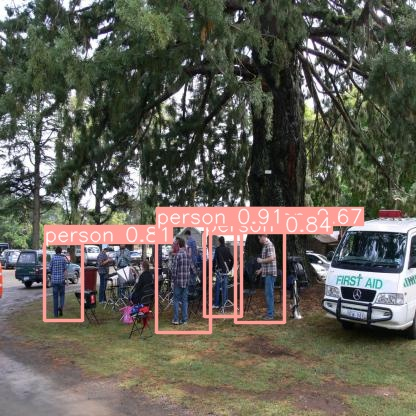

In [ ]:
Image(filename=f'/content/runs/detect/predict/img1030.jpg', width=600)

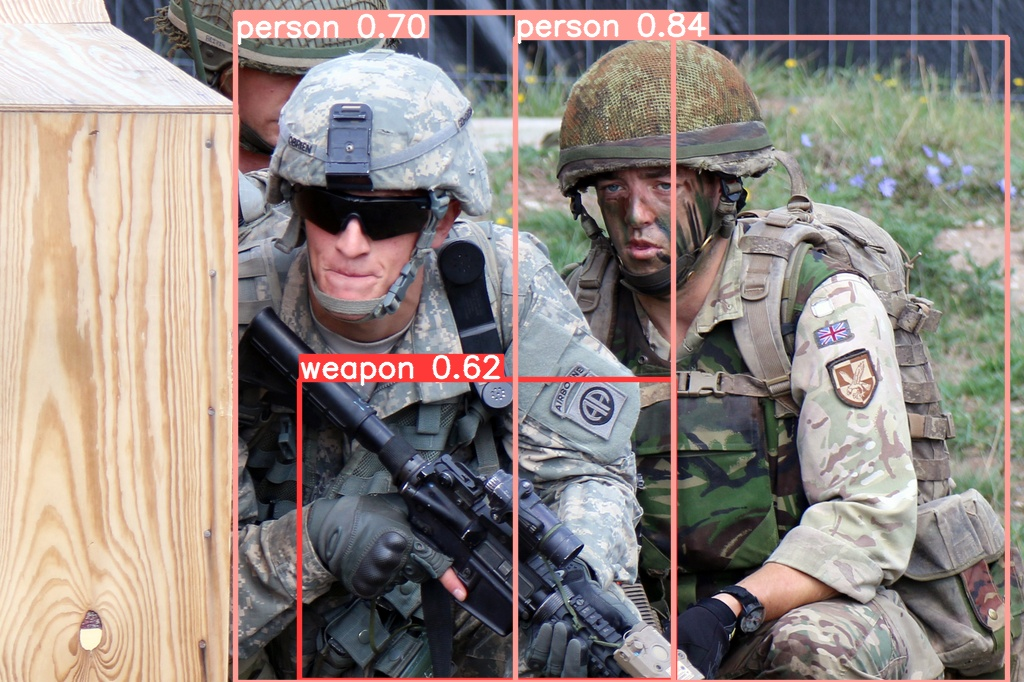

In [ ]:
Image(filename=f'/content/runs/detect/predict/bb89bbd34314fb91.jpg', width=600)

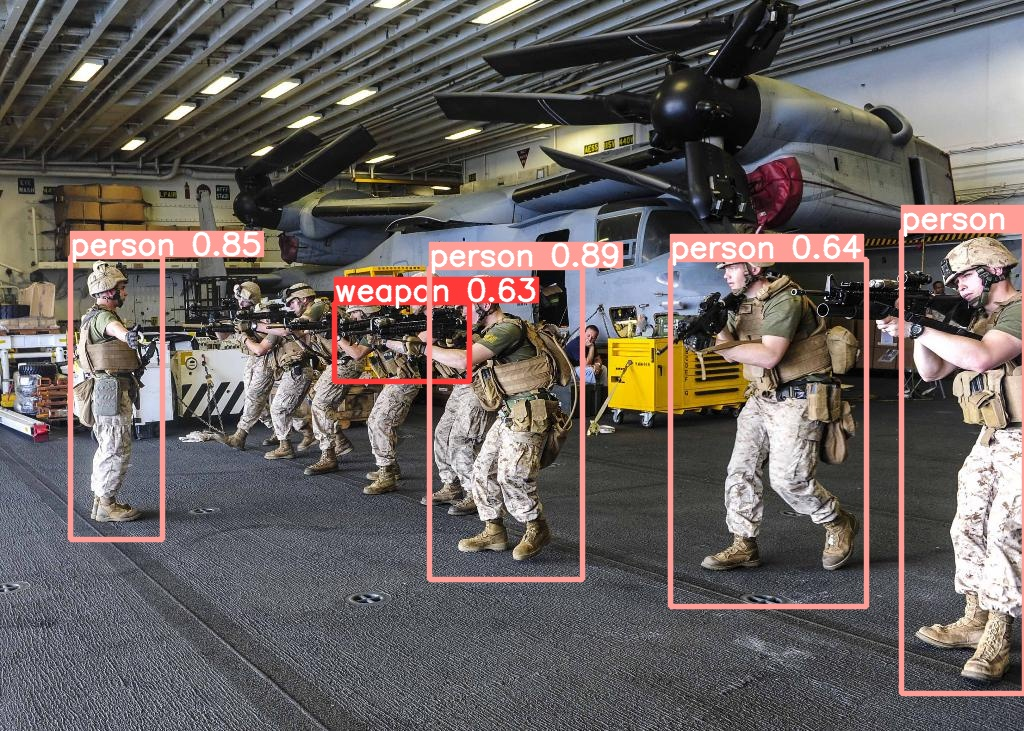

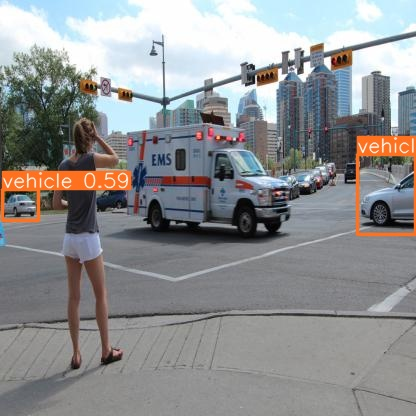

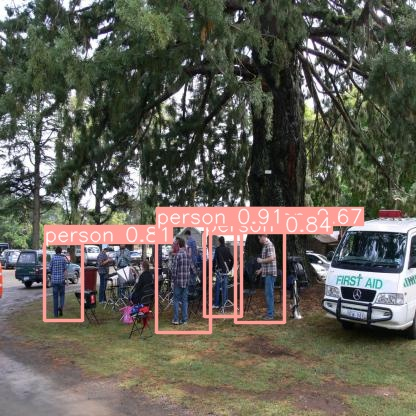

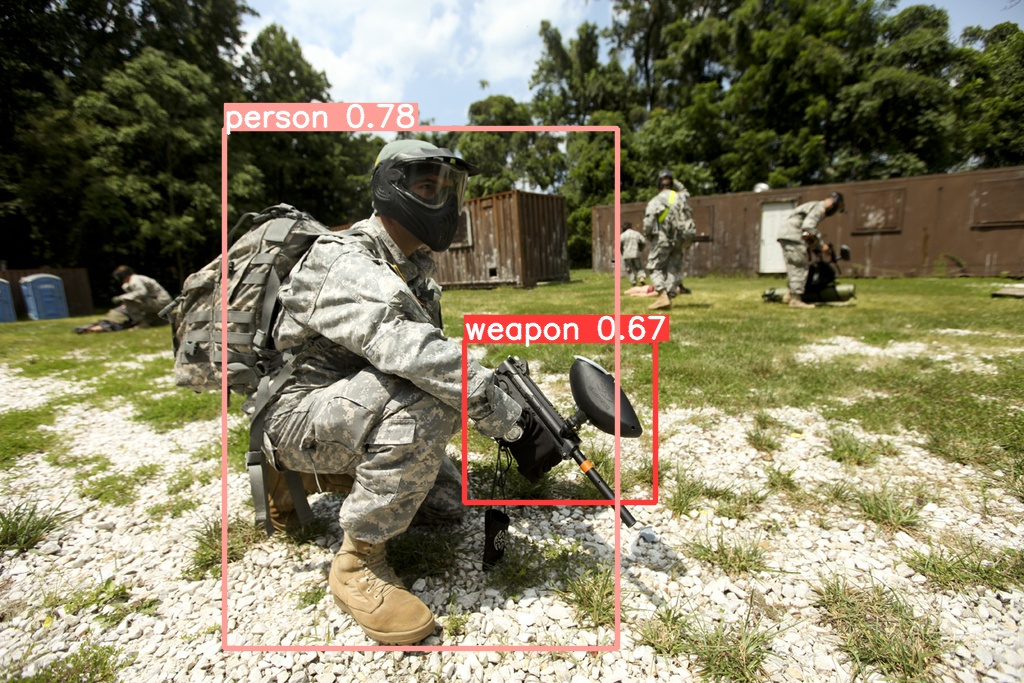

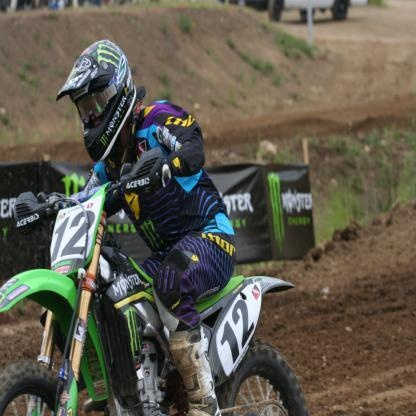

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
!cp -r /content/runs/detect/predict3 /content/drive/Shareddrives/CapstoneBangkit/Model/output

In [ ]:
!yolo detect predict model=/content/drive/Shareddrives/CapstoneBangkit/Model/training_results/cctv2/weights/best.pt conf=0.77 source=/content/drive/Shareddrives/CapstoneBangkit/Model/test_videos

WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
Ultralytics YOLOv8.0.116  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients

video 1/1 (1/211) /content/drive/Shareddrives/CapstoneBangkit/Model/test_videos/IMG_7282.MP4: 640x416 1 person, 63.4ms
video 1/1 (2/211) /content/drive/Shareddrives/CapstoneBangkit/Model/test_videos/IMG_7282.MP4: 640x416 1 person, 5.8ms
video 1/1 (3/211) /content/drive/Shareddrives/CapstoneBangkit/Model/test_videos/IMG_7282.MP4: 640x416 1 person, 5.8ms
video 1/1 (4/211) /content/drive/Shareddrives/CapstoneBangkit/Model/test_videos/IMG_7282.MP4: 640x416 1 person, 5.8ms
video 1/1 (5/211) /content/drive/Shareddrives/CapstoneBangkit/Model/test_videos/IMG_7282.MP4: 640x416 1 person, 5.8ms
video 1/1 (6/211) /content/drive/Shareddrives/CapstoneBangkit/Model/test_videos/IMG_7282.MP4: 640x416 1 person, 5.8ms
video 1/1 (7/211) /content/drive/Shareddrives/Capston

In [ ]:
!cp -r /content/runs/detect/predict3 /content/drive/Shareddrives/CapstoneBangkit/Model/output

In [ ]:
tf_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", from_pt=True)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tf_model.save_pretrained("bert-base-uncased")

In [ ]:
!cp -r /content/bert-base-uncased/tf_model.h5 /content/drive/Shareddrives/CapstoneBangkit/Model